# Actividad 3
## Aprendizaje Automatico
### Fabian Martinez Solano
### Jairo Cuartas Molina
### Javier Diaz Arca



#Introducción

En el presente trabajo se busca analizar factores relacionados con las transacciones realizadas por medio de tarjeta de crédito con el objetibo de identificar operaciones anómalas para identificar cuando podría ser un fraude.

#Dataset
Los datos para el presente trabajo se pueden obtener de los links

https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection

https://raw.githubusercontent.com/fabianm95/UNIR/main/MachineLearning/creditcardcsvpresent.csv



# Definir el Problema a Resolver

El objetivo del presente trabajo es desarrollar un modelo de busqueda de datos anormales por medio de algoritmos de machine learning en lo correspondiente a transacciones con tarjeta de crédito.

## Datos de Entrada

Se tiene un total de 12 variables, de las cuales la primera es el numero de ID del comerciante, y las siguientes corresponden a características relacionadas con la transacción. Finalmente la ultima columna corresponde a si la operación fue o no fraudulenta. 

|| Variable | Tipo |
| - | :- | - |
|0| Merchant_id | Numérico
|1| Transaction date | Numérico
|2| Average Amount/transaction/day | Nominal
|3| Transaction_amount | Numérico
|4| Is declined |  Numérico
|5| Total Number of declines/day | Nominal
|6| isForeignTransaction | Nominal
|7| isHighRiskCountry | Nominal
|8| Daily_chargeback_avg_amt | Nominal
|9| 6_month_avg_chbk_amt | Nominal
|10| 6-month_chbk_freq | Nominal
|11| isFradulent | Nominal

# Importar Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

#Algoritmos
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



# Cargar Datasets

El dataset se encuentra localizado en Github.

In [2]:
creditcard = pd.read_csv('https://raw.githubusercontent.com/fabianm95/UNIR/main/MachineLearning/creditcardcsvpresent.csv')

# Descripcion  y Limpieza de los datos

In [3]:
creditcard.shape

(3075, 12)

In [4]:
creditcard.head(5)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


Existe un total de 3075 entradas o registros de las transacciones realizadas con tarjetas de creditos, cada una con sus repectivas características descriptivas.

## Identificacion de Variables

In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [6]:
creditcard.isFradulent.value_counts()

N    2627
Y     448
Name: isFradulent, dtype: int64

En el dataset se presentan 12 variables, siendo la primera de ellas el numero de identificación del cliente, y de las restanets 4 son de tipo categórico y 7 de tipo numérico.
De un total de 3075 registros, 2627 de ellos (85% aproximadamente) corresponden a movimientos verdaderos mientras que 448 (15% restante aprox.) corresponden a transacciones fraudulentas.

## Remover Datos Duplicados

Se revisa que en los registros no existan registros iguales (con la misma información en todas las variables).

Como no se encuentran duplicados, se procede con el tratamiento de datos sin eliminar registros.

In [7]:
duplicados = creditcard.duplicated()
duplicados.value_counts()

False    3075
dtype: int64

## Eliminar columnas de datos Innecesarios

Debido a que la en la base de datos la variable correspondiente a la fecha de transacción se encuentra vacía en todos los registros, se elimina.

In [8]:
creditcard.drop('Transaction date',axis=1, inplace=True)

In [9]:
creditcard.head(2)

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y


Se evalua la cantidad de datos faltantes en cada una de las variables (en %)

In [10]:
missing = creditcard.isnull().sum()
missingporc = missing[missing>=0]*100/len(creditcard)
missingporc

Merchant_id                       0.0
Average Amount/transaction/day    0.0
Transaction_amount                0.0
Is declined                       0.0
Total Number of declines/day      0.0
isForeignTransaction              0.0
isHighRiskCountry                 0.0
Daily_chargeback_avg_amt          0.0
6_month_avg_chbk_amt              0.0
6-month_chbk_freq                 0.0
isFradulent                       0.0
dtype: float64

Como se observa anteriormente, en las demás variables no se encuentran datos nulos, quedando el dataset con 11 variables.

## Analisis Univariable

### Variables Numericas

In [11]:
#Descripcion variales numericas
creditcard.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Merchant_id,3075.0,5.026634e+09,9.870778e+08,3.160041e+09,4.170814e+09,5.025578e+09,5.889625e+09,6.665906e+09
Average Amount/transaction/day,3075.0,5.150266e+02,2.919070e+02,4.011527e+00,2.697880e+02,5.025496e+02,7.652728e+02,2.000000e+03
Transaction_amount,3075.0,9.876399e+03,1.013533e+04,0.000000e+00,2.408781e+03,6.698892e+03,1.442257e+04,1.080000e+05
Total Number of declines/day,3075.0,9.573984e-01,2.192391e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Daily_chargeback_avg_amt,3075.0,5.573756e+01,2.066348e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+02
6_month_avg_chbk_amt,3075.0,4.002241e+01,1.559688e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+02
6-month_chbk_freq,3075.0,3.918699e-01,1.548479e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00


In [12]:
#Varianza
creditcard.var()

Merchant_id                       9.743226e+17
Average Amount/transaction/day    8.520968e+04
Transaction_amount                1.027249e+08
Total Number of declines/day      4.806577e+00
Daily_chargeback_avg_amt          4.269793e+04
6_month_avg_chbk_amt              2.432628e+04
6-month_chbk_freq                 2.397787e+00
dtype: float64

In [13]:
#Sesgo
creditcard.skew()

Merchant_id                      -0.015352
Average Amount/transaction/day    0.178622
Transaction_amount                2.106235
Total Number of declines/day      2.694874
Daily_chargeback_avg_amt          3.565048
6_month_avg_chbk_amt              4.037422
6-month_chbk_freq                 4.049305
dtype: float64

In [14]:
#Curtosis
creditcard.kurtosis()

Merchant_id                       -1.202855
Average Amount/transaction/day    -0.367184
Transaction_amount                 8.486367
Total Number of declines/day       8.872378
Daily_chargeback_avg_amt          11.112125
6_month_avg_chbk_amt              15.675940
6-month_chbk_freq                 15.360236
dtype: float64

<Figure size 432x288 with 0 Axes>

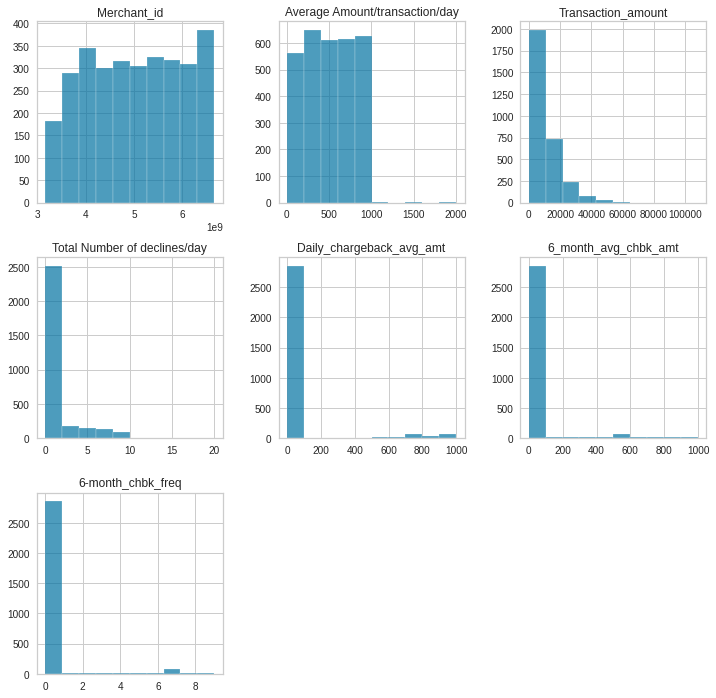

<Figure size 432x288 with 0 Axes>

In [15]:
creditcard.hist(figsize=(12,12), edgecolor='white', alpha =0.7)
plt.figure()

Se puede observar en las anteriores gráficas que la mayoría de las transacciones son de valores menores a 1000 por día, el numero de declinados por día  yl el cotragargo es en su gran mayoría 0, y mensualmente la cantidad de contracargo tambien es usualmente 0.

### Variables Categoricas

In [16]:
creditcardCategoricas = creditcard.select_dtypes(include=['object'])

In [17]:
#Datos en variables categoricas
for col in creditcardCategoricas:
  print(f"{col} = {creditcardCategoricas[col].unique()}")

Is declined = ['N' 'Y']
isForeignTransaction = ['Y' 'N']
isHighRiskCountry = ['Y' 'N']
isFradulent = ['Y' 'N']


In [18]:
#Elementos por categoria
columnaCategorica = creditcardCategoricas.value_counts(ascending=False)

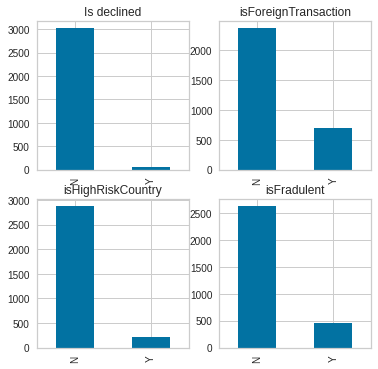

In [19]:
fig, ax = plt.subplots(2,2,figsize=(6,6))
count = 0;
nombrecategorias = list(creditcardCategoricas.columns)
for i in range(0,2):
  for j in range(0,2):
    if count<=4:
      a = nombrecategorias[count]
      creditcardCategoricas[a].value_counts().plot.bar(ax=ax[i,j]).set_title(a)
    count = count+1
fig.show()

En las variables categóricas se observa que todas ellas son de tipo binario y se encuentran desbalanceadas. Es de gra interés la variable de fraudulento, pues es la que nos muestra el grupo de interés.

## Analisis Bivariable

Como lasvariables categóricas son binarias, se puedes cambiar a valor de 1 y 0.

In [20]:
creditcard['Is declined'] = creditcard['Is declined'].map({'Y': 1, 'N': 0})
creditcard['isForeignTransaction'] = creditcard['isForeignTransaction'].map({'Y': 1, 'N': 0})
creditcard['isHighRiskCountry'] = creditcard['isHighRiskCountry'].map({'Y': 1, 'N': 0})
creditcard['isFradulent'] = creditcard['isFradulent'].map({'Y': -1, 'N': 1})
creditcard.head(2)

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,-1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,-1


,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Merchant_id,1.000000,0.018223,0.046065,0.159211,-0.016165,0.030289,0.028611,0.088802,0.091621,0.118599,-0.043068
Average Amount/transaction/day,0.018223,1.000000,0.587111,0.081184,-0.009682,0.047316,0.014604,0.060429,0.060284,0.071849,-0.023504
Transaction_amount,0.046065,0.587111,1.000000,0.197009,0.259309,0.276764,0.325397,0.252298,0.259663,0.297623,-0.528913
Is declined,0.159211,0.081184,0.197009,1.000000,0.115961,0.079761,0.127586,0.394083,0.407917,0.499365,-0.271282
Total Number of declines/day,-0.016165,-0.009682,0.259309,0.115961,1.000000,0.227904,0.292459,0.094834,0.081138,0.085028,-0.531990
isForeignTransaction,0.030289,0.047316,0.276764,0.079761,0.227904,1.000000,0.489572,0.054798,0.060566,0.077083,-0.478113
isHighRiskCountry,0.028611,0.014604,0.325397,0.127586,0.292459,0.489572,1.000000,0.074902,0.073167,0.098241,-0.639792
Daily_chargeback_avg_amt,0.088802,0.060429,0.252298,0.394083,0.094834,0.054798,0.074902,1.000000,0.953663,0.884611,-0.385964
6_month_avg_chbk_amt,0.091621,0.060284,0.259663,0.407917,0.081138,0.060566,0.073167,0.953663,1.000000,0.851339,-0.375758
6-month_chbk_freq,0.118599,0.071849,0.297623,0.499365,0.085028,0.077083,0.098241,0.884611,0.851339,1.000000,-0.443824


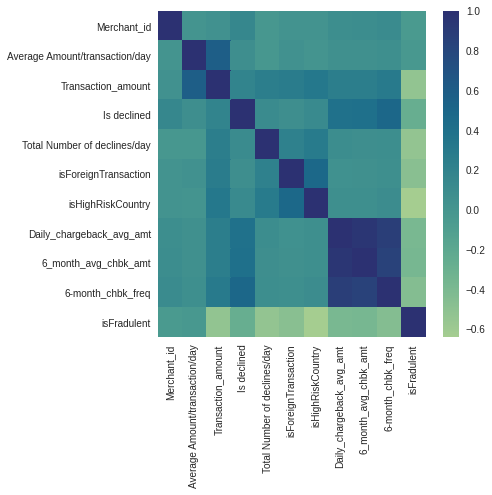

In [21]:
correlaciones = creditcard.corr()
plt.subplots(figsize=(6,6))
display(correlaciones)
sns.heatmap(correlaciones,cmap = 'crest');

In [22]:
correlacionesabds = abs(correlaciones).mask(np.arange(abs(correlaciones).shape[0]) >= np.arange(abs(correlaciones).shape[1])[:, np.newaxis])
correlacionesnumero = correlacionesabds[correlacionesabds >= 0.7]
np.stack(correlacionesnumero.notnull().values.nonzero()).T.tolist()

[[8, 7], [9, 7], [9, 8]]

Existe una alta correlacion (mayor a 0.7) entre las siguientes variables:

  - Daily chargeback avg amt
  - 6 month avg chbk amt
  - 6 month avg chbk freq

Debido a que el ID de la persona que realiza la transacción no importa para el desarrollo del problema, se elimina la columna de datos innecesaria.

In [23]:
creditcard.drop(['Merchant_id'],axis=1, inplace=True)

Se tiene un total de 10 variables importantes para la generación del modelo.

In [24]:
Fraudulentos = creditcard['isFradulent']
creditcard.drop(['isFradulent'],axis=1, inplace=True)

# DETECCION DE ANOMALIAS DE LOS DATOS (MACHINE LEARNING)

Se realiza la normalización de las variables de 0 a 1

In [25]:
scaler = MinMaxScaler()
creditcardnorm = scaler.fit_transform(creditcard)
creditcardnorm = pd.DataFrame(creditcardnorm)
creditcardnorm.columns = creditcard.columns
creditcardnorm.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,0.048091,0.027778,0.0,0.25,1.0,1.0,0.000000,0.000000,0.000000
1,0.048091,0.039815,0.0,0.25,1.0,1.0,0.000000,0.000000,0.000000
2,0.090927,0.044657,1.0,0.25,0.0,0.0,0.000000,0.000000,0.000000
3,0.090927,0.046375,1.0,0.40,0.0,0.0,0.000000,0.000000,0.000000
4,0.248493,0.240741,0.0,0.00,1.0,1.0,0.801603,0.678557,0.666667


## K - means

In [26]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(creditcard)
kmeans3 = KMeans(n_clusters=2, random_state=0).fit(creditcard)
kmeans2norm = KMeans(n_clusters=2, random_state=0).fit(creditcardnorm)
kmeans3norm = KMeans(n_clusters=2, random_state=0).fit(creditcardnorm)

In [27]:
kmeans2.cluster_centers_
y_kmeans2 = kmeans2.predict(creditcard)
y_kmeans3 = kmeans3.predict(creditcard)
y_kmeans2norm = kmeans2norm.predict(creditcardnorm)
y_kmeans3norm = kmeans3norm.predict(creditcardnorm)

In [28]:
#Parametros para K-means
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(creditcardnorm)
    preds = clusterer.predict(creditcardnorm)
    centers = clusterer.cluster_centers_

    score = silhouette_score (creditcardnorm, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.6590264196018376)
For n_clusters = 3, silhouette score is 0.7003400863741616)
For n_clusters = 4, silhouette score is 0.7309692114159188)
For n_clusters = 5, silhouette score is 0.7419235688222274)
For n_clusters = 6, silhouette score is 0.5198209925152866)
For n_clusters = 7, silhouette score is 0.5221159111333219)
For n_clusters = 8, silhouette score is 0.526904790060962)
For n_clusters = 9, silhouette score is 0.5204921810348736)


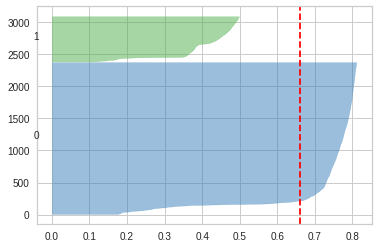

In [29]:
_ = SilhouetteVisualizer(KMeans(n_clusters=2)).fit(creditcardnorm)

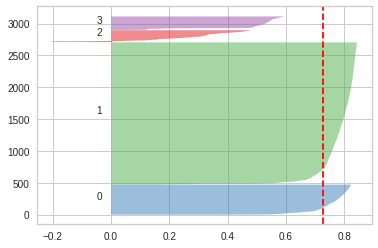

In [30]:
_ = SilhouetteVisualizer(KMeans(n_clusters=4)).fit(creditcardnorm)

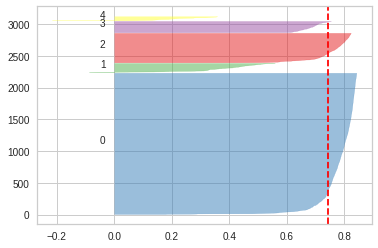

In [31]:
_ = SilhouetteVisualizer(KMeans(n_clusters=5)).fit(creditcardnorm)

Una de las separaciones de los datos tomando en cuenta dos variables se presenta a continuación:

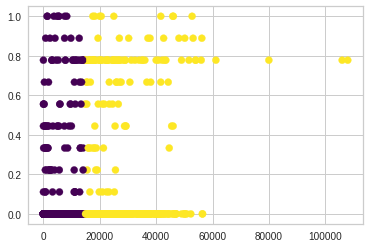

In [32]:
plt.scatter(creditcard.iloc[:, 1], creditcardnorm.iloc[:, 8], c=y_kmeans2, s=50, cmap='viridis')

# Anomalias

### Isolation Forest


In [33]:
modelo_isof = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.15,
                n_jobs        = -1,
                random_state  = 123,
            )

modelo_isof.fit(creditcard)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=-1, random_state=123, verbose=0, warm_start=False)

In [34]:
#Prediccion
clasificacion_IsForest = modelo_isof.predict(creditcard)
clasificacion_IsForest
# -1 para anomalia y 1 para normal

array([-1, -1, -1, ..., -1, -1, -1])

In [35]:
#Comparación
CompIF = np.multiply(clasificacion_IsForest, Fraudulentos)
CompIF.value_counts()

 1    2933
-1     142
Name: isFradulent, dtype: int64

In [36]:
target_names = ["Fraude", "No fraude"]
print(classification_report(Fraudulentos, clasificacion_IsForest, target_names=target_names))

              precision    recall  f1-score   support

      Fraude       0.83      0.86      0.84       448
   No fraude       0.98      0.97      0.97      2627

    accuracy                           0.95      3075
   macro avg       0.90      0.91      0.91      3075
weighted avg       0.95      0.95      0.95      3075



In [37]:
print(confusion_matrix(Fraudulentos, clasificacion_IsForest, labels=[1, -1]))

[[2549   78]
 [  64  384]]


# LocalOutlierFactor

In [38]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.15)
clasificacion_LOF = clf.fit_predict(creditcard)
clasificacion_LOF
# 1 inlier, -1 outlier

array([ 1,  1,  1, ..., -1, -1,  1])

In [39]:
#Comparación
CompLOF = np.multiply(clasificacion_LOF, Fraudulentos)
CompLOF.value_counts()

 1    2551
-1     524
Name: isFradulent, dtype: int64

In [40]:
target_names = ["Fraude", "No fraude"]
print(classification_report(Fraudulentos, clasificacion_LOF, target_names=target_names))

              precision    recall  f1-score   support

      Fraude       0.42      0.43      0.42       448
   No fraude       0.90      0.90      0.90      2627

    accuracy                           0.83      3075
   macro avg       0.66      0.66      0.66      3075
weighted avg       0.83      0.83      0.83      3075



In [41]:
print(confusion_matrix(Fraudulentos, clasificacion_LOF, labels=[1, -1]))

[[2358  269]
 [ 255  193]]


# EllipticEnvelope

In [42]:
clf = EllipticEnvelope(contamination=0.15)
clf.fit(creditcard)
clasificacion_EE = clf.predict(creditcard)
clasificacion_EE

array([ 1,  1, -1, ..., -1, -1, -1])

In [43]:
#Comparación
CompEE = np.multiply(clasificacion_EE, Fraudulentos)
CompEE.value_counts()

 1    2853
-1     222
Name: isFradulent, dtype: int64

In [44]:
target_names = ["Fraude", "No fraude"]
print(classification_report(Fraudulentos, clasificacion_EE, target_names=target_names))

              precision    recall  f1-score   support

      Fraude       0.74      0.77      0.76       448
   No fraude       0.96      0.96      0.96      2627

    accuracy                           0.93      3075
   macro avg       0.85      0.86      0.86      3075
weighted avg       0.93      0.93      0.93      3075



In [45]:
print(confusion_matrix(Fraudulentos, clasificacion_EE, labels=[1, -1]))

[[2509  118]
 [ 104  344]]


Se tiene por tanto en los tres métodos de detección de outliers las siguientes clasificaciones correctas (precisión) teniendo en cuenta que la salida correcta está dada por la columna "Is Fraudulent", la cual debería corresponder con la agrupación con etiqueta (-1) que hace referencia a estos outliers o transacciones fraudulentas. 

La comparación se realiza tomando las clasificadas como outliers y que si son fraudulentas, y las clasificadas como normales y que efectivamente no son fraudulentas como bien clasificadas de manera que se tiene:

In [46]:
print("Clasificadas correctamente por Isolated Forest: ", 2551/3075)
print("Clasificadas correctamente por LocalOutlierFactor: ", 2551/3075)
print("Clasificadas correctamente por EllipticEnvelope: ", 2557/3075)


Clasificadas correctamente por Isolated Forest:  0.8295934959349593
Clasificadas correctamente por LocalOutlierFactor:  0.8295934959349593
Clasificadas correctamente por EllipticEnvelope:  0.8315447154471545


# Conclusiones


Se concluye finalmente que el problema de identificación de transacciones fraudulentas puede modelarse como un problema de detección de datos anómalos.

Adicionalmente para este problema el mejor rendimiento con respecto a la exactitud corresponde al algoritmo de Elliptic envelope, LocalOutlierFactor, y finalmente por Isolated Forest.  

Ahora, si se tiene en cuenta la matriz de confusión (que se debería de tener en cuenta por ser un dataset desbalanceado) podemos ver el orden sería Elliptic envelope, Isolated Forest, finalmente por LocalOutlierFactor.